<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/Model_Corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I found this [article](https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d) that uses a mathematical model to predict the spread of Corona Virus in Italy. I have adapted this for my own purposes. Thanks to the Author.

This notebook will attemp to use the model provided by the author to other countries to predict the spread of Covid-19. 

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

df = pd.read_csv(url)

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030


Logistic Function is defined

'a' refers to the infection speed

'b' is the day with the maximum infections occurred

'c' is the total number of recorded infected people at the infection’s end

In [0]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [0]:
def get_date(day):
  return (datetime(2020, 1, 1) + timedelta(day - 1)).strftime("%m-%d-%Y")

In [81]:
7%2

1

In [0]:
def model_corona(country):
  # Data preparation
  df1 = df.loc[df['Country/Region'] == country, :].drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum().reset_index()
  df1.columns = ['date', 'cases']
  df1['date'] = pd.to_datetime(df1.loc[:,'date'])

  x = list(df1.iloc[:,0].dt.dayofyear)
  y = list(df1.iloc[:,1])

  # Use the curve_fit function of scipy library to estimate the parameter values and errors starting from the original data.
  fit = curve_fit(logistic_model,x,y,p0=[2,100,2000])

  # Use the fsolve function of scipy to numerically find the root of the equation that defines the infection end day.
  a = fit[0][0]
  b = fit[0][1]
  c = fit[0][2]
  sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

  lastday = (datetime(2020, 1, 1) + timedelta(sol - 1)).strftime("%m-%d-%Y")

  # Plot the curve
  #fig, ax = plt.subplots()
  pred_x = list(range(max(x),sol))
  plt.rcParams['figure.figsize'] = [16, 6]
  plt.rc('font', size=10)
  plt.xlim(22,150)
  plt.ylim((min(y)*0.9,100000))
  
  # Real data
  plt.scatter(x,y, c='red')
  
  # Predicted logistic curve
  plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label=country)

  # Get Date values for display
  pos = []
  label = []
  for i in x+pred_x:
    if i%7 == 0:
      pos.append(i)
      label.append(get_date(i))

  #ax.set_xticklabels(xt, rotation=90)
  plt.xticks(pos, label, rotation=90)

  plt.legend()
  plt.title('Spread of Cov')
  plt.ylabel("Total number of infected people")
  plt.xlabel("Date")
  
  plt.tight_layout()
  plt.savefig('Model.png')

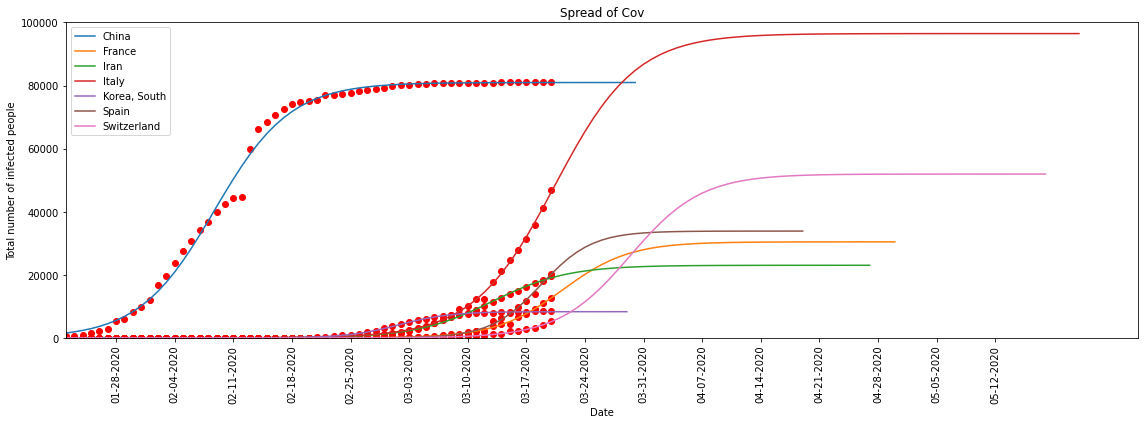

In [111]:
countries = ['China', 'France', 'Iran', 'Italy', 'Korea, South', 'Spain', 'Switzerland']
#countries = ['Italy', 'France']
for country in countries:
  #print('Country: ', country)
  model_corona(country)